<a href="https://colab.research.google.com/github/tfindiamooc/mlp/blob/main/TextAnalysisClass3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson #3b: Text Classification with Naive Bayes classifier

Welcome to a focused lesson on **Naive Bayes** classifiers! We've touched upon Naive Bayes in the previous lesson, but now we'll dedicate a whole session to understand it in detail and explore its strengths for text classification.

In this lesson, we will:

*   Build **Naive Bayes pipelines** for text classification.
*   Understand **what Naive Bayes is and how it works**.
*   Explore different **types of Naive Bayes classifiers**, focusing on **Multinomial Naive Bayes**.
*   Experiment with **different vectorizers** with Naive Bayes.
*   Learn how to **inspect** a Naive Bayes model to understand feature importance.
*   Use **GridSearchCV** to **tune hyperparameters** of Naive Bayes.

Let's start by building a basic Naive Bayes pipeline and revisiting its performance!

In [ ]:
# Code Cell 1: Basic Naive Bayes Pipeline Code
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create Naive Bayes Pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# 4. Train Pipeline
nb_pipeline.fit(X_train, y_train)

# 5. Make Predictions
y_pred_nb_pipeline = nb_pipeline.predict(X_test)

# 6. Evaluate Performance
print("Naive Bayes Pipeline Classification Report:")
print(classification_report(y_test, y_pred_nb_pipeline, target_names=target_names))

Naive Bayes Pipeline Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.98      0.95      0.97       235
soc.religion.christian       0.96      0.99      0.97       304

              accuracy                           0.97       539
             macro avg       0.97      0.97      0.97       539
          weighted avg       0.97      0.97      0.97       539



### Naive Bayes Pipeline - Recap

This code should look familiar! It's the basic Naive Bayes pipeline we built in the previous lesson. Let's quickly recap the components:

1.  **Dataset Loading and Splitting:** We load the 20 Newsgroups dataset and split it into training and testing sets.
2.  **Pipeline Creation:** We create a scikit-learn pipeline with two steps:
    *   **`TfidfVectorizer`:**  Vectorizes the text data using TF-IDF.
    *   **`MultinomialNB`:**  The Naive Bayes classifier model.
3.  **Pipeline Training:** We train the pipeline on the training data (`nb_pipeline.fit`).
4.  **Prediction and Evaluation:** We make predictions on the test set and evaluate the performance using `classification_report`.

Run this code to remind yourself of the baseline performance of a Naive Bayes classifier with TF-IDF.

Now, let's dive deeper into understanding what Naive Bayes is and why it works for text.

### What is Naive Bayes? - Understanding the Concept

Naive Bayes is a family of probabilistic classifiers based on **Bayes' Theorem**.  Let's break down the key ideas:

*   **Bayes' Theorem:**  At its heart, Naive Bayes uses Bayes' Theorem to calculate the probability of a document belonging to a certain class, given the words in the document.  Bayes' Theorem looks like this:

    P(Class | Document) = [P(Document | Class) * P(Class)] / P(Document)

    Don't worry too much about the formula itself, but understand what it's doing:

    *   It's trying to find the probability of the **Class** (e.g., 'alt.atheism' or 'soc.religion.christian') *given* the **Document** (the text of the newsgroup post).
    *   It uses prior probabilities (P(Class)) and likelihoods (P(Document | Class)) to do this.

*   **"Naive" Assumption: Feature Independence**
    *   This is the "naive" part! Naive Bayes makes a simplifying assumption that **the features (words in text) are independent of each other given the class.**
    *   In reality, words in text are *not* independent.  The presence of one word often influences the probability of another word appearing.
    *   For example, if you see "movie" you might be more likely to see "actor" or "director" nearby.
    *   Despite this unrealistic assumption, Naive Bayes works surprisingly well for text classification in practice, especially for tasks like spam detection or topic categorization. It's computationally efficient and often provides a good baseline performance.

*   **Probabilistic Classifier:** Naive Bayes is a **probabilistic classifier**. It outputs probabilities for each class, indicating the model's confidence in its prediction.

In the next text cell, we'll briefly touch upon different types of Naive Bayes classifiers.

### Types of Naive Bayes Classifiers

Scikit-learn provides different types of Naive Bayes classifiers, each suitable for different types of data:

*   **Multinomial Naive Bayes (`MultinomialNB`):**
    *   **Best for:** **Discrete data** - especially **count data** like word counts in text documents.
    *   **Assumption:** Features are multinomially distributed (think of drawing words from a bag of words for each class).
    *   **Why it's good for text:** Text data represented as word counts (like in Bag of Words) or TF-IDF values (which can be thought of as "weighted counts") often works well with MultinomialNB. This is the one we are using in this lesson.

*   **Gaussian Naive Bayes (`GaussianNB`):**
    *   **Best for:** **Continuous data** that is normally distributed (Gaussian distribution).
    *   **Assumption:** Features are normally distributed.
    *   **Less common for raw text features:**  Not typically used directly with word counts or TF-IDF, as these are not normally distributed. Might be used with dense word embeddings if you assume embeddings are approximately Gaussian.

*   **Bernoulli Naive Bayes (`BernoulliNB`):**
    *   **Best for:** **Binary features** (features that are either present or absent - 0 or 1).
    *   **Assumption:** Features are binary-valued.
    *   **Can be used for text:** You could binarize word features (e.g., 1 if word is present in document, 0 if absent) and use BernoulliNB.

**In Text Classification, we often use Multinomial Naive Bayes (`MultinomialNB`) because it's well-suited for word count or TF-IDF representations.**

Let's experiment with using different vectorizers with Naive Bayes to see how it affects performance.

In [ ]:
# Code Cell 2: Naive Bayes with different vectorizers (CountVectorizer, TF-IDF)
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Dataset & Split Data (Same as before)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Pipelines with different vectorizers
# Pipeline with CountVectorizer (BoW)
nb_pipeline_bow = Pipeline([
    ('bow', CountVectorizer(stop_words='english', max_features=5000)), # Using CountVectorizer instead of TfidfVectorizer
    ('nb', MultinomialNB())
])

# Pipeline with TfidfVectorizer (TF-IDF) - (Same as before for comparison)
nb_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# 3. Train Pipelines
nb_pipeline_bow.fit(X_train, y_train)
nb_pipeline_tfidf.fit(X_train, y_train)

# 4. Make Predictions
y_pred_nb_bow = nb_pipeline_bow.predict(X_test)
y_pred_nb_tfidf = nb_pipeline_tfidf.predict(X_test)

# 5. Evaluate Performance - Compare BoW and TF-IDF
print("Naive Bayes Pipeline with CountVectorizer (BoW) Classification Report:")
print(classification_report(y_test, y_pred_nb_bow, target_names=target_names))

print("\nNaive Bayes Pipeline with TfidfVectorizer (TF-IDF) Classification Report:")
print(classification_report(y_test, y_pred_nb_tfidf, target_names=target_names))

Naive Bayes Pipeline with CountVectorizer (BoW) Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.98      0.97       235
soc.religion.christian       0.99      0.97      0.98       304

              accuracy                           0.98       539
             macro avg       0.98      0.98      0.98       539
          weighted avg       0.98      0.98      0.98       539


Naive Bayes Pipeline with TfidfVectorizer (TF-IDF) Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.98      0.95      0.97       235
soc.religion.christian       0.96      0.99      0.97       304

              accuracy                           0.97       539
             macro avg       0.97      0.97      0.97       539
          weighted avg       0.97      0.97      0.97       539



### Comparing Vectorizers with Naive Bayes

In the code above, we created two Naive Bayes pipelines:

*   **`nb_pipeline_bow`**: Uses `CountVectorizer` (Bag of Words) for vectorization.
*   **`nb_pipeline_tfidf`**: Uses `TfidfVectorizer` (TF-IDF) for vectorization (this is our original pipeline).

Run this code and compare the classification reports for both pipelines.

**Questions to consider:**

*   Does using TF-IDF vectorization improve the performance of Naive Bayes compared to using simple Bag of Words (CountVectorizer)?
*   By how much does the performance change (look at F1-scores, accuracy)?
*   Is the improvement significant?

TF-IDF often weights words by their importance, which can be helpful for Naive Bayes (and other models) to focus on more discriminative features.

Now, let's inspect the Naive Bayes model to understand which words are considered important for each class.

Naive Bayes Pipeline with TF-IDF Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.98      0.95      0.97       235
soc.religion.christian       0.96      0.99      0.97       304

              accuracy                           0.97       539
             macro avg       0.97      0.97      0.97       539
          weighted avg       0.97      0.97      0.97       539


Top 20 Features (Words) for Naive Bayes - Class 0 (alt.atheism):
edu
com
keith
writes
god
posting
sgi
article
nntp
host
atheists
people
caltech
atheism
livesey
don
organization
subject
lines
think

Top 20 Features (Words) for Naive Bayes - Class 1 (soc.religion.christian):
god
edu
jesus
church
com
christian
people
sin
christ
christians
subject
bible
lines
know
rutgers
think
organization
believe
university
christianity


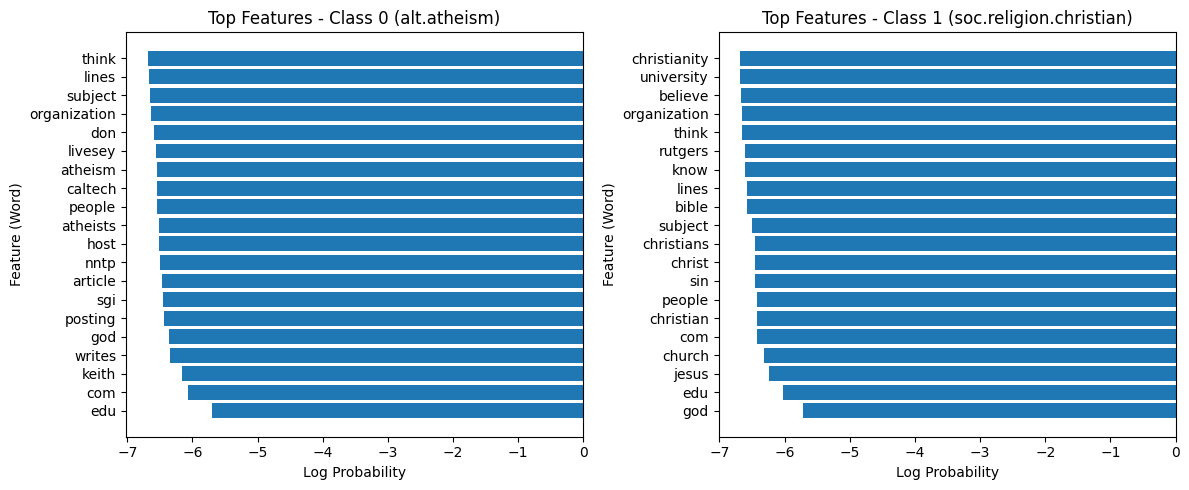

In [ ]:
# Code Cell 3: Naive Bayes Model Inspection (Feature Log-Probabilities)
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Dataset & Split Data (Same as before)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Create Naive Bayes Pipeline (TF-IDF - for inspection)
nb_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# 3. Train Pipeline (Same as before)
nb_pipeline_tfidf.fit(X_train, y_train)

# 4. Make Predictions & Evaluate (Same as before)
y_pred_nb_tfidf = nb_pipeline_tfidf.predict(X_test)
print("Naive Bayes Pipeline with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_nb_tfidf, target_names=target_names))

# 5. Model Inspection - Naive Bayes Feature Log-Probabilities (Same inspection code as before)
feature_names = nb_pipeline_tfidf.named_steps['tfidf'].get_feature_names_out()
nb_log_probs_class0 = nb_pipeline_tfidf.named_steps['nb'].feature_log_prob_[0]
nb_log_probs_class1 = nb_pipeline_tfidf.named_steps['nb'].feature_log_prob_[1]

top_features_class0_indices = nb_log_probs_class0.argsort()[-20:][::-1]
top_features_class1_indices = nb_log_probs_class1.argsort()[-20:][::-1]

top_features_class0 = feature_names[top_features_class0_indices]
top_features_class1 = feature_names[top_features_class1_indices]

print("\nTop 20 Features (Words) for Naive Bayes - Class 0 (alt.atheism):")
for feature in top_features_class0:
    print(feature)

print("\nTop 20 Features (Words) for Naive Bayes - Class 1 (soc.religion.christian):")
for feature in top_features_class1:
    print(feature)

# (Optional) Visualization - Bar plots for top features per class (Same visualization code as before)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(top_features_class0[::-1], nb_log_probs_class0[top_features_class0_indices][::-1])
plt.xlabel("Log Probability")
plt.ylabel("Feature (Word)")
plt.title(f"Top Features - Class 0 ({target_names[0]})")
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(top_features_class1[::-1], nb_log_probs_class1[top_features_class1_indices][::-1])
plt.xlabel("Log Probability")
plt.ylabel("Feature (Word)")
plt.title(f"Top Features - Class 1 ({target_names[1]})")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Explanation of Naive Bayes Model Inspection

This is the same model inspection code for Naive Bayes that we used in the previous lesson.  It extracts and displays the **top 20 features (words) with the highest log-probabilities for each class** ('alt.atheism' and 'soc.religion.christian').

Run this code and examine the "Top 20 Features" for each class.

**Interpreting Naive Bayes Feature Log-Probabilities:**

*   Remember, in Naive Bayes, **feature log-probabilities** indicate how likely each word is to appear in documents of a particular class.
*   **Higher log-probability** for a word in a class means the model considers that word **more strongly associated with that class**.

Do the top words for each class make sense in the context of 'alt.atheism' and 'soc.religion.christian'? Are they different from the top features you observed for Logistic Regression?

Now, let's tune the hyperparameters of the Naive Bayes classifier using GridSearchCV!

In [ ]:
# Code Cell 4: Naive Bayes Hyperparameter Tuning (GridSearchCV)
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Dataset & Split Data (Same as before)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Create Naive Bayes Pipeline (TF-IDF) - (Same pipeline as before)
nb_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

# 3. Define Hyperparameter Grid for Naive Bayes GridSearchCV
param_grid_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], # Tune ngram range for TF-IDF
    'tfidf__use_idf': [True, False], # Tune use_idf for TF-IDF (whether to use IDF weighting)
    'nb__alpha': [0.1, 1.0, 2.0], # Tune alpha (smoothing parameter) for MultinomialNB
}

# 4. Set up GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(nb_pipeline_tfidf, param_grid_nb, cv=5, scoring='f1_macro', n_jobs=-1)

# 5. Run GridSearchCV for Naive Bayes (Fit on training data - longer)
grid_search_nb.fit(X_train, y_train)

# 6. Get Best Model and Best Parameters for Naive Bayes
best_nb_pipeline = grid_search_nb.best_estimator_
best_params_nb = grid_search_nb.best_params_

print("Best Naive Bayes Pipeline Parameters from GridSearchCV:")
print(best_params_nb)

# 7. Evaluate Best Naive Bayes Model on Test Set
y_pred_best_nb = best_nb_pipeline.predict(X_test)
print("\nClassification Report for Best Naive Bayes Pipeline (on Test Set):")
print(classification_report(y_test, y_pred_best_nb, target_names=target_names))

Best Naive Bayes Pipeline Parameters from GridSearchCV:
{'nb__alpha': 0.1, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': True}

Classification Report for Best Naive Bayes Pipeline (on Test Set):
                        precision    recall  f1-score   support

           alt.atheism       0.98      0.97      0.97       235
soc.religion.christian       0.98      0.98      0.98       304

              accuracy                           0.98       539
             macro avg       0.98      0.98      0.98       539
          weighted avg       0.98      0.98      0.98       539



### Explanation of Naive Bayes Hyperparameter Tuning with GridSearchCV

Let's understand the hyperparameter tuning code for Naive Bayes:

*   **Step 3: Define Hyperparameter Grid for Naive Bayes GridSearchCV:**
    *   `param_grid_nb` defines the hyperparameter grid specifically for the Naive Bayes pipeline.
    *   We are tuning:
        *   `tfidf__ngram_range`:  Trying unigrams and bigrams for TF-IDF.
        *   `tfidf__use_idf`:  Trying both `True` (use IDF weighting) and `False` (no IDF weighting) for TF-IDF.
        *   `nb__alpha`:  Tuning the `alpha` parameter of `MultinomialNB`.
            *   **`alpha` (Smoothing Parameter):**  `alpha` is a smoothing parameter in Multinomial Naive Bayes (also known as Laplace or Lidstone smoothing). It prevents issues with zero counts.
            *   If a word does not appear in the training data for a particular class, its probability would be zero without smoothing. This can cause problems in Naive Bayes calculations.
            *   `alpha > 0` adds a small count (alpha) to all word counts for each class, ensuring that no probabilities are exactly zero.
            *   Tuning `alpha` can sometimes improve performance. Common values to try are in the range of 0 to a few units (e.g., 0.1, 0.5, 1.0, 2.0...). `alpha=1.0` is often used as default (Laplace smoothing).

*   **Step 4: Set up GridSearchCV for Naive Bayes:** We create `grid_search_nb` using the `nb_pipeline_tfidf` and `param_grid_nb`.

The rest of the GridSearchCV process (Steps 5-7) is the same as we saw in the previous lesson: GridSearchCV explores the hyperparameter grid, performs cross-validation, finds the best parameters, and evaluates the best model on the test set.

Run the Naive Bayes GridSearchCV code. It will take some time. Examine the "Best Parameters" and the "Classification Report for Best Naive Bayes Pipeline". Did hyperparameter tuning improve the performance of the Naive Bayes classifier? What are the best hyperparameters found by GridSearchCV?

Now, let's move on to experimentation prompts to further explore Naive Bayes.

### Experimentation Prompts - Naive Bayes Deep Dive

Time to experiment specifically with Naive Bayes! Try these:

1.  **Datasets and Naive Bayes Performance:**
    *   Change the `categories` in `fetch_20newsgroups` to different pairs of categories (like in the previous lesson's experimentation prompts).
    *   For each dataset:
        *   Run GridSearchCV for the Naive Bayes pipeline (with the `param_grid_nb` we defined).
        *   Compare the best performance of Naive Bayes on different datasets.
        *   Is Naive Bayes performance consistent across different topic pairs, or does it work better for some datasets than others?

2.  **Tuning `alpha` (Smoothing):**
    *   Expand the `nb__alpha` values in `param_grid_nb` to include a wider range (e.g., `[0.0001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]`).  Small values like `0.0001` mean very little smoothing, while larger values mean more smoothing.
    *   How does the choice of `alpha` affect Naive Bayes performance? Is there an optimal range of `alpha` values?

3.  **Vectorizers and Naive Bayes:**
    *   Experiment with different vectorizers in the Naive Bayes pipeline:
        *   **`CountVectorizer` (BoW):** We already tried this.
        *   **`TfidfVectorizer` (TF-IDF):**  Our default.
        *   **Try different parameters within `CountVectorizer` and `TfidfVectorizer`** (e.g., `ngram_range`, `max_df`, `min_df`, `max_features`).  You can add these to your `param_grid_nb` to tune them along with Naive Bayes hyperparameters.
    *   Which vectorizer (and vectorizer parameters) works best with Naive Bayes for text classification?

4.  **Bernoulli Naive Bayes:**
    *   Try using `BernoulliNB` instead of `MultinomialNB` in the pipeline.
    *   You'll likely need to binarize your features for BernoulliNB to be most effective (e.g., using `CountVectorizer(binary=True)` or `TfidfTransformer(transformer='binarize')` after TF-IDF).  Experiment with binarization and BernoulliNB.
    *   How does Bernoulli Naive Bayes compare to Multinomial Naive Bayes for text classification on this dataset?  When might you choose one over the other?

Think about these questions as you experiment:

*   Is Naive Bayes sensitive to hyperparameter tuning?
*   How does the choice of vectorizer interact with Naive Bayes performance?
*   When is Naive Bayes a good choice for text classification, and when might you consider other models?

After your experiments, read the summary and key takeaways for this lesson.

### Summary and Next Steps - Naive Bayes Focus

Excellent work focusing on Naive Bayes! In this lesson, you've:

*   Built and understood **Naive Bayes pipelines**.
*   Learned about the **"naive" independence assumption** and why Naive Bayes works for text.
*   Explored **different types of Naive Bayes classifiers**, with a focus on **MultinomialNB**.
*   Experimented with **vectorizers** and **hyperparameter tuning** for Naive Bayes.
*   Inspected a Naive Bayes model to understand **feature log-probabilities**.

**Key Takeaways for Naive Bayes:**

*   Naive Bayes is a **simple, fast, and often effective** classifier for text, especially for tasks like topic categorization and spam detection.
*   **Multinomial Naive Bayes (`MultinomialNB`)** is often a good choice for text data represented as word counts or TF-IDF.
*   **TF-IDF vectorization** often improves Naive Bayes performance compared to simple Bag of Words.
*   **Hyperparameter tuning (especially `alpha` smoothing)** can sometimes provide small performance gains for Naive Bayes.
*   Naive Bayes is relatively **interpretable** – feature log-probabilities help understand word importance for each class.
*   Despite its "naive" assumptions, Naive Bayes is a valuable tool in the text classification toolkit, especially as a **baseline model** and for tasks where speed and simplicity are important.

**Next Steps:**

In the upcoming lessons, we'll continue to expand our toolkit with more powerful models:

*   **Random Forest** ensemble methods.
*   **Neural Networks** for text classification, starting with Feedforward Networks and then moving to Recurrent Neural Networks.
*   Advanced text representation techniques like **word embeddings**.

By understanding models like Naive Bayes in depth, you are building a strong foundation for tackling more complex text analysis challenges! Keep experimenting and exploring!

### Key Takeaways for Lesson #3b (Naive Bayes Specific):

*   Naive Bayes is a probabilistic classifier based on Bayes' Theorem and the naive feature independence assumption.
*   MultinomialNB is well-suited for text data (word counts, TF-IDF).
*   TF-IDF often enhances Naive Bayes performance.
*   `alpha` (smoothing) is a key hyperparameter for MultinomialNB.
*   Naive Bayes is fast, simple, interpretable, and a good baseline for text classification.
*   Experiment with different vectorizers and hyperparameters to optimize Naive Bayes for your task.

### Resources for Lesson #3b (Naive Bayes Specific):

*   **Scikit-learn documentation on `MultinomialNB`:** [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
*   **Scikit-learn documentation on `BernoulliNB`:** [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
*   **Scikit-learn documentation on `GaussianNB`:** [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

### Additional Notes - Naive Bayes Specific Considerations:

*   **Feature Independence Assumption:** Always remember the "naive" feature independence assumption of Naive Bayes. While it often works well, it's important to be aware of this limitation. For tasks where word order and feature dependencies are very crucial, more complex models that can capture these dependencies (like Recurrent Neural Networks) might be necessary.

*   **Zero Counts and Smoothing (`alpha`):** Smoothing with `alpha` is important for Multinomial Naive Bayes, especially when dealing with text data. Experiment with different `alpha` values during hyperparameter tuning to find a good balance.

*   **Negative Values:**  Multinomial Naive Bayes is designed for non-negative features (counts or TF-IDF values).  If you use vectorization techniques that can produce negative values (though less common with basic TF-IDF or BoW), you might need to consider other Naive Bayes variants or models.

*   **Dataset Size:** Naive Bayes can perform surprisingly well even with relatively small datasets, and it often benefits from larger datasets.

*   **Baseline Model:**  Naive Bayes is often a great choice as a **baseline model** to compare against more complex classifiers.  If a more complex model doesn't significantly outperform Naive Bayes, the simpler Naive Bayes model might be preferred due to its speed and interpretability.